In [14]:
candidate_nicknames = {
	"ronaldo": [
				"cristiano",
				"c. ronaldo",
				"ronaldo",
				"penaldo",
				"cr7",
				"cr",
				"cristiano ronaldo",
				"@cristiano"
				],
	"messi": [
				"leo",
				"messi",
				"lionel",
				"pulga",
				"messidona",
				"lionel messi",
				"@teammessi"
				],
	"neymar": [
				"neymar",
				"neymar jr.",
				"neymar jr",
				"neymar da silva santos júnior",
				"@neymarjr",
				],
	"buffon": [
				"buffon",
				"gigi",
				"superman",
				"gianluigi",
				"gianluigi buffon",
				"@gianluigibuffon"
				],
	"ramos": [
				"ramos",
				"sergio",
				"sergio ramos",
				"cuqui",
				"garcía",
				"sergio ramos garcía",
				"@sergioramos"
				]
}

negative_dict = [
					"not",
					"dont",
					"don't",
					"doesnt",
					"doesn't",
					"cant",
					"can't",
					"isn't",
					"isnt",
					"aren't",
					"arent",
					"wont",
					"won't",
					"shouldnt",
					"shouldn't",
					"musn't",
					"musnt"
				]


sample_tweets = [
					("Barcelona Soccer Shirt Lionel Messi #10 Futbol Jersey Men's Hooded Sweatshirt #Messi #BallondOr #ElClasico &gt;\u2026 https://t.co/mTckH6GLsO",1),
					("Lionel Messi will win the Ballon d'Or 2017. @fundacionmessi #BallondOr https://t.co/UIhwASxhux",1),
					("Ramos holds uncertainty over Ronaldo´s future at Madrid ##Atleticomadrid ##BallonDor… https://t.co/zpI7Pvt3RQ https://t.co/gfgP3HWBeG",0),
					("RT @CRonaldoSource: @Cristiano @nikefootball The best player in the world ?? #CristianoRonaldo #BallondOr https://t.co/T7IZpsTY4i",1)
				]


candidate_scores = {
	"ronaldo": {
		"positif": 1,
		"negatif": 1
	},
	"messi": {
		"positif": 1,
		"negatif": 1
	},
	"neymar": {
		"positif": 1,
		"negatif": 1
	},
	"buffon": {
		"positif": 1,
		"negatif": 1
	},
	"ramos": {
		"positif": 1,
		"negatif": 1
	},
}

def getCandidate(tweet):
	tweet = tweet.lower()
	result = "none"
	for key, value in candidate_nicknames.items():
		for nickname in value:
			if nickname in tweet:
				result = key
				break

		if result != "none":
			break

	return result

def countScore(samples):
	for sample in samples:
		candidate = getCandidate(sample[0])
		if candidate != "none":
			if (sample[1] == 1):
				candidate_scores[candidate]["positif"] += 1
			else:
				candidate_scores[candidate]["negatif"] += 1				

countScore(sample_tweets)
print(candidate_scores)


# print(getCandidate("Barcelona Soccer Shirt Lionel Messi #10 Futbol Jersey Men's Hooded Sweatshirt #Messi #BallondOr #ElClasico &gt;\u2026 https://t.co/mTckH6GLsO"))


{'ronaldo': {'positif': 2, 'negatif': 2}, 'messi': {'positif': 3, 'negatif': 1}, 'neymar': {'positif': 1, 'negatif': 1}, 'buffon': {'positif': 1, 'negatif': 1}, 'ramos': {'positif': 1, 'negatif': 1}}


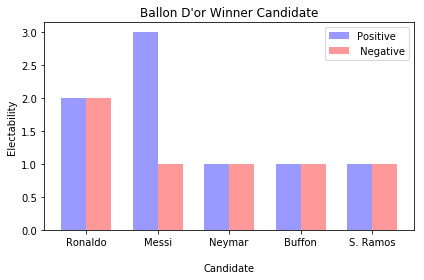

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple


n_groups = 5


means_positif = [
                    candidate_scores["ronaldo"]["positif"], 
                    candidate_scores["messi"]["positif"],
                    candidate_scores["neymar"]["positif"],
                    candidate_scores["buffon"]["positif"],
                    candidate_scores["ramos"]["positif"],
                ]
# std_positif = [2, 3, 4, 1, 2]

means_negatif = [
                    candidate_scores["ronaldo"]["negatif"], 
                    candidate_scores["messi"]["negatif"],
                    candidate_scores["neymar"]["negatif"],
                    candidate_scores["buffon"]["negatif"],
                    candidate_scores["ramos"]["negatif"],
                ]
# std_negatif = [3, 5, 2, 3, 3]

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, means_positif, bar_width,
                alpha=opacity, color='b',
#                 yerr=std_positif, 
                error_kw=error_config,
                label='Positive')

rects2 = ax.bar(index + bar_width, means_negatif, bar_width,
                alpha=opacity, color='r',
#                 yerr=std_negatif, 
                error_kw=error_config,
                label=' Negative')

ax.set_xlabel('\nCandidate')
ax.set_ylabel('Electability')
ax.set_title('Ballon D\'or Winner Candidate')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('Ronaldo', 'Messi', 'Neymar', 'Buffon', 'S. Ramos'))
ax.legend()

fig.tight_layout()
plt.show()
